<a href="https://colab.research.google.com/github/DingLi23/s2search/blob/pipelining/pipelining/ale-exp1/cslg_1w_ale_plotting.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment Description

2-way ALE.

> This notebook is for experiment \<ale-exp1\> and data sample \<cslg-rand-1000\>.

### Initialization

In [123]:
%load_ext autoreload
%autoreload 2
import numpy as np, sys, os
in_colab = 'google.colab' in sys.modules
# fetching code and data(if you are using colab
if in_colab:
    !rm -rf s2search
    !git clone --branch pipelining https://github.com/youyinnn/s2search.git
    sys.path.insert(1, './s2search')
    %cd s2search/pipelining/pdp-exp1/

pic_dir = os.path.join('.', 'plot')
if not os.path.exists(pic_dir):
    os.mkdir(pic_dir)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading Data

In [124]:

sys.path.insert(1, '../../')
import numpy as np, sys, os
from getting_data import read_conf

sample_name = 'cslg-rand-1000'

f_list = [
    'title', 
    'abstract', 
    'venue', 
    # 'authors', 
    'year', 
    'n_citations'
    ]
ale_rs = []

def replace_quantile(feature_name, quantile):
    if feature_name == 'year' or feature_name == 'n_citations':
        return quantile
    else:
        return list(range(len(quantile)))

for i in range(len(f_list)):
    f1_name = f_list[i]
    for j in range(i + 1, len(f_list)):
        f2_name = f_list[j]
        file = os.path.join('.', 'scores', f'{sample_name}_2w_ale_{f1_name}_{f2_name}.npz')
        if os.path.exists(file):
            nparr = np.load(file)
            quantile_1 = nparr['quantile_1']
            quantile_2 = nparr['quantile_2']
            ale_result = nparr['ale_result']
            
            ale = {
                'ale': ale_result,
                'f1_quantile': replace_quantile(f1_name, quantile_1),
                'f2_quantile': replace_quantile(f2_name, quantile_2),
                'f1_name': f1_name,
                'f2_name': f2_name,
            }
                
            ale_rs.append(ale)

### Ranker

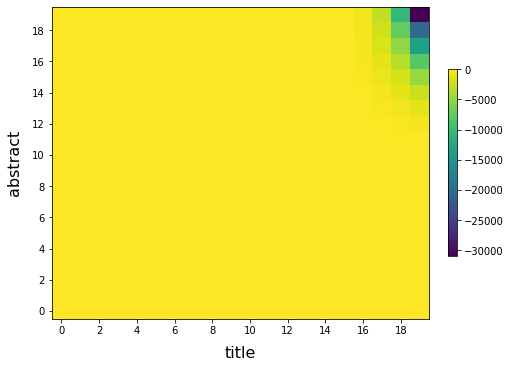

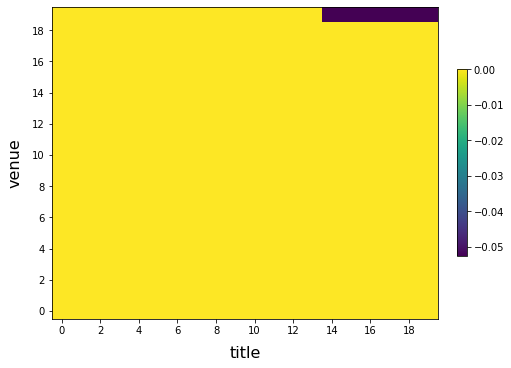

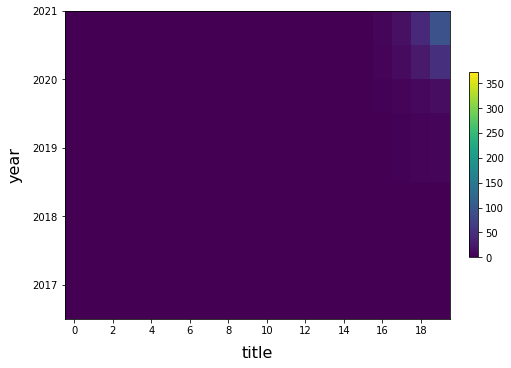

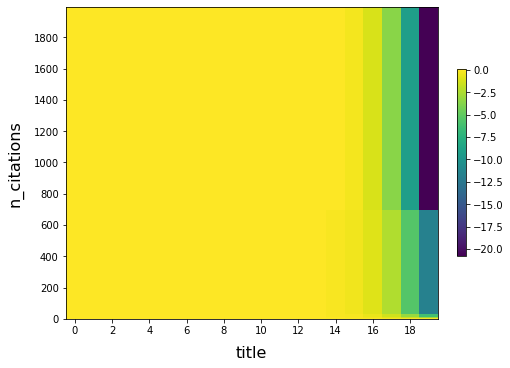

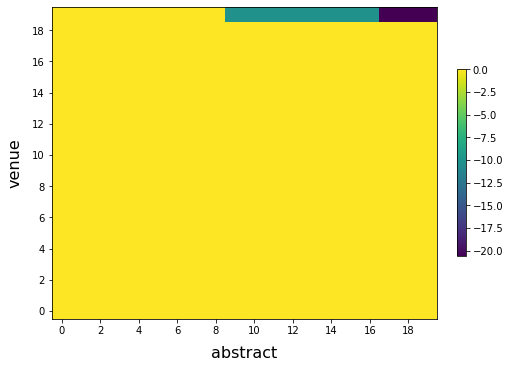

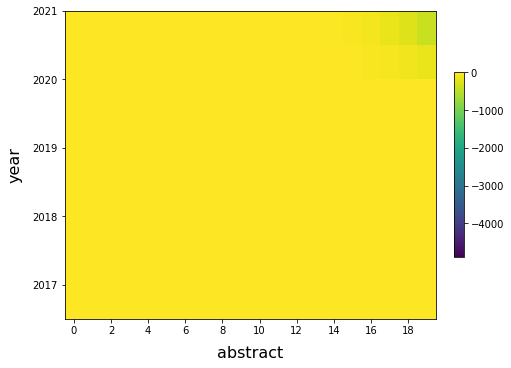

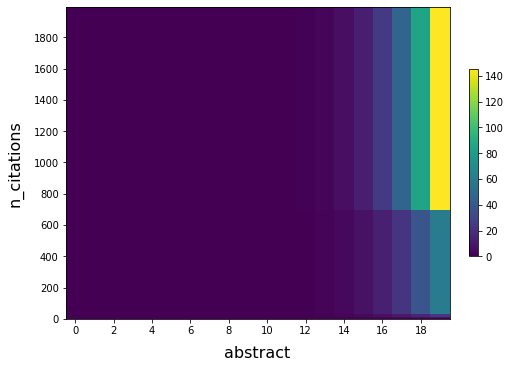

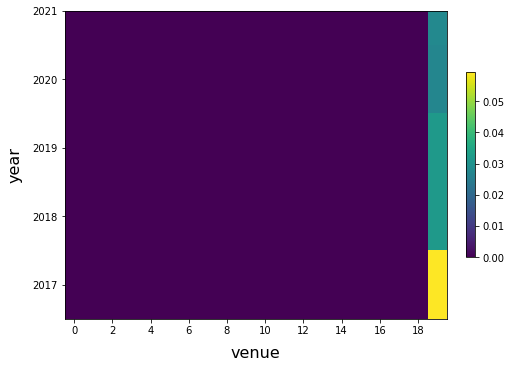

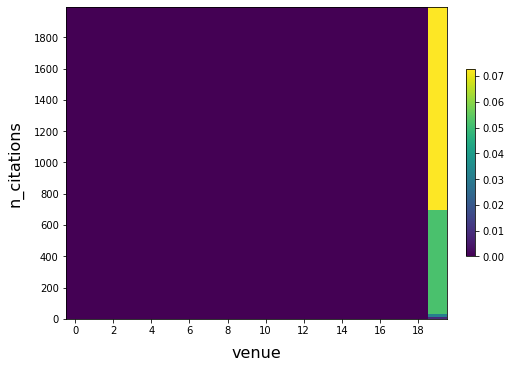

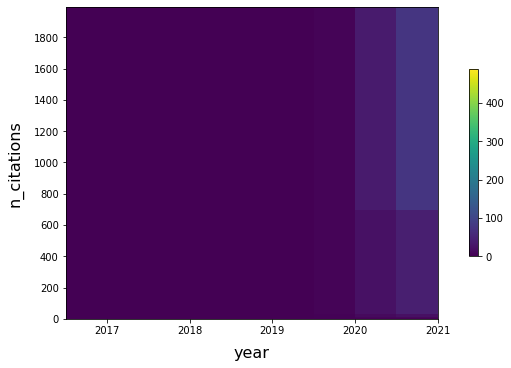

In [125]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

for ale in ale_rs:
    fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
    im = ax.pcolormesh(ale['f1_quantile'], ale['f2_quantile'], ale['ale'], edgecolors='k', linewidths=0)
    ax.set_xlabel(ale['f1_name'], fontsize=16, labelpad=10)
    ax.set_ylabel(ale['f2_name'], fontsize=16, labelpad=10)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    fig.colorbar(im, ax=ax, shrink=0.6)